# Python Decision Tree
A Jupyter notebook for building a machine learning decision tree.

## 1. Import libraries

Google "python decision tree". You'll see the first result takes us to http://scikit-learn.org/stable/modules/tree.html. This is the documentation for a python machine learning package called `sklearn` will be our guide, and we will adapt it for our HR data.

Following this documentation, our first step is to import in the code to build a decision tree:


In [1]:
from sklearn import tree
import pandas as pd

## 2. Load data

Where is our data right now? In a csv file, in the same folder as this file. So, we've got to bring that data in, we've got to make the connection.

Let's go back to google for guidance. "import csv python" or other variations show some [ugly code](https://docs.python.org/2/library/csv.html). There must me a simpler way!

Well, thanks to [Wes Mckinney](http://wesmckinney.com/), there is. He created another library to make things a lot smoother for data scientists and he called it "pandas".

If we google "import csv pandas" we find a few walkthroughs, including https://pythonhow.com/data-analysis-with-python-pandas/.

Looks like we need to import it, so let's add that under our "Import libraries" section above and then load in our data.

It's also always good to look at the data we're loading in, so we can use `data.head()` for a preview of the top few lines:

In [2]:
data = pd.read_csv("../HR_clean.csv")
data.head()

,department,region,termination_date,bracket_salary 1,salary,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,resigned
0,technical,US,2015-06-27T00:00:00Z,low,52000,0.82,0.63,4,232,4,0,0,0
1,product_mng,Europe,2017-02-24T00:00:00Z,low,36000,0.72,0.79,4,154,3,0,0,0
2,sales,Canada,2008-12-06T00:00:00Z,medium,77000,0.71,0.88,3,140,2,0,0,0
3,support,US,2015-11-22T00:00:00Z,medium,70000,0.53,0.75,4,239,2,1,0,0
4,technical,US,2009-03-29T00:00:00Z,medium,76000,0.49,0.49,2,245,3,0,0,0


Now, following the sklearn documentation again, we want to separate out our Y (the thing we want to predict), from our X (the things we want to use to predict Y).

Grabbing one column is easy, but to grab a range, we have to use `.iloc` for index location:

In [3]:
Y = data["resigned"]
X = data.iloc[:,4:-1]

## 3. Build and fit decision tree

Now we have our data ready, let's make this machine learn!

We can now copy and paste in those last two lines from the sklearn documentation below, and run it for machine learning model (stored inside `clf`):

In [4]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X, Y)

<br><br><br>...wait, that's it? Can I see my tree please?<br><br><br>
## 4. Evaluate decision tree

Looking further down our sklearn documentation, it looks like they've given us code to visualize the decision tree that is stored inside `clf`. We have taken that code and adapted it for our data below, just run it and take a look:

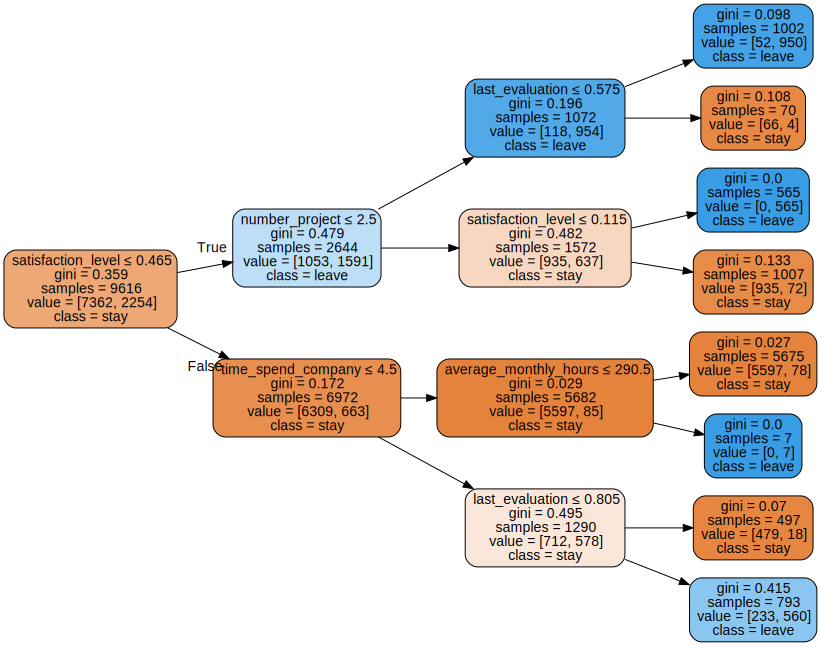

In [6]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names = X.columns,  
                         class_names = ["stay","leave"],  
                         filled=True, rounded=True,  
                         special_characters=True, rotate=True)  
graph = graphviz.Source(dot_data)  
graph 

Wait, is your tree huge? If so, then it means we're probably asking *too many* questions. To limit the number we can add the `max_depth=3` parameter to our `tree.DecisionTreeClassifier()` method above, and re-run our code. This is important, as managing the depth of your tree prevents [overfitting](https://elitedatascience.com/overfitting-in-machine-learning).

The last question we might have is, "how good is this tree"? Well, if we look deeper in the documentation, we'll see there's a simple way of testing the accuracy of our tree and making predictions.

This is just going to to test on the same data we trained on though, is that the best way of doing it?

In [7]:
clf.score(X,Y)

0.9524750415973378

### ---- Bonus Material -----

What if we wanted to train on some data, and test on different data? Well, we could train on some of our data and then test on the rest, in a process known as **cross-validation**.

Sklearn even has it's own package for it: http://scikit-learn.org/stable/modules/cross_validation.html

And there is one function that will do this for us, known as `cross_val_score`:

In [8]:
from sklearn.model_selection import cross_val_score

train_test = cross_val_score(clf, X, Y)

print(train_test)

[0.95686071 0.950078   0.94903796 0.95839834 0.94695788]
